# Загрузка датасета

In [1]:
# Подгружаем нужные для работы библиотеки

from IPython.display import display, HTML
import matplotlib.pyplot as plt
from scipy.stats import skew
from typing import List
import seaborn as sns
import pandas as pd
import numpy as np
import kagglehub
import os

In [2]:
# Загрузка датасета

path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

# Проверка названия файла в категории

print(os.listdir(path))

['StudentPerformanceFactors.csv']


In [3]:
df_main = pd.read_csv(path + '/StudentPerformanceFactors.csv')

# Копия датасета для анализа

df = df_main.copy()


In [4]:
# вывод для теста

df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Проверка качества данных и тренировки с переменными (для домашней работы №2)

In [5]:
# Поиск нулевых данных в столбцах

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
# Проверим на уникальные данные и систематизируем их

from typing import List

for col in df.columns:
    unique_count: int = df[col].nunique()  # Количество уникальных значений для каждого столбца
    unique_values: List = df[col].unique().tolist()  # Список уникальных значений для каждого столбца
    
    # Проверяем, все ли значения можно преобразовать в числа (чтобы отсеять числовые поля)
    is_numeric: bool = pd.to_numeric(df[col], errors='coerce').notnull().all()
    
    if is_numeric:
        print(f"Столбец '{col}': уникальных значений {unique_count} — цифровые значения")
    else:
        print(f"Столбец '{col}': уникальных значений {unique_count} — {unique_values[:5]}")


Столбец 'Hours_Studied': уникальных значений 41 — цифровые значения
Столбец 'Attendance': уникальных значений 41 — цифровые значения
Столбец 'Parental_Involvement': уникальных значений 3 — ['Low', 'Medium', 'High']
Столбец 'Access_to_Resources': уникальных значений 3 — ['High', 'Medium', 'Low']
Столбец 'Extracurricular_Activities': уникальных значений 2 — ['No', 'Yes']
Столбец 'Sleep_Hours': уникальных значений 7 — цифровые значения
Столбец 'Previous_Scores': уникальных значений 51 — цифровые значения
Столбец 'Motivation_Level': уникальных значений 3 — ['Low', 'Medium', 'High']
Столбец 'Internet_Access': уникальных значений 2 — ['Yes', 'No']
Столбец 'Tutoring_Sessions': уникальных значений 9 — цифровые значения
Столбец 'Family_Income': уникальных значений 3 — ['Low', 'Medium', 'High']
Столбец 'Teacher_Quality': уникальных значений 3 — ['Medium', 'High', 'Low', nan]
Столбец 'School_Type': уникальных значений 2 — ['Public', 'Private']
Столбец 'Peer_Influence': уникальных значений 3 — ['P

# Задача: Исходя из наличия таких столбцов как Previous_Scores Exam_Score требуется устновить завсисимость изменения оценок от внешних факторов студентов

# Вывод: Исходя из данных по нулевым/"nan" значениям и уникальности данных мы видим, что нулевые/"nan" значения есть только в столбцах Teacher_Quality, Parental_Education_Level,Distance_from_Home. Но так как данные не связаны между собой, то удалять строки с "nan" значениями в этих столбцах мы не будем. Но   при расчете непорственно зависимости оценок за экзамен от данных факторов значения "nan" мы учитывать не будем, т.к их нельзя отнести однозначно к какой либо категории и объединять их в отдельную категорию не имеет смысла.

In [7]:
df['average_score'] = (df['Previous_Scores'] + df['Exam_Score'])/2    # Присваивание и мат функции

In [8]:
df['average_score'] 

0       70.0
1       60.0
2       82.5
3       84.5
4       67.5
        ... 
6602    72.0
6603    75.0
6604    66.5
6605    79.5
6606    79.0
Name: average_score, Length: 6607, dtype: float64

In [9]:
average_score_mean: float = df['average_score'].mean()                 # типизация/аннотация
print(f"Средняя оценка всех студентов по резльтатам обоих экзаменов {average_score_mean:.2f}")

Средняя оценка всех студентов 71.15


In [10]:
df['Tutoring_Sessions'].describe()

count    6607.000000
mean        1.493719
std         1.230570
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: Tutoring_Sessions, dtype: float64

# Вывод: Судя по распределению данных Tutoring_Sessions - это кол-во посещений репетиторов(занятий)

In [11]:
df['Physical_Activity'].describe() 

count    6607.000000
mean        2.967610
std         1.031231
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Physical_Activity, dtype: float64

In [12]:
df['Physical_Activity'].value_counts()

Physical_Activity
3    2545
2    1627
4    1575
1     421
5     361
0      46
6      32
Name: count, dtype: int64

# Вывод: Судя по распределению данных Physical_Activity - это кол-во занятий  физ. активностью в неделю (без учета времени занятий)

In [13]:
# отдельно проверим распределение для столбцов первичных и финальных результатов

df['Exam_Score'].describe() 

count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

In [14]:
df['Previous_Scores'].describe()

count    6607.000000
mean       75.070531
std        14.399784
min        50.000000
25%        63.000000
50%        75.000000
75%        88.000000
max       100.000000
Name: Previous_Scores, dtype: float64

# Вывод: У данных есть небольшие перекосы т.к mean (среднее) больще медианы (50%). Поэтому можно попробовать проверить перекос

In [15]:
# Проверим коэффициент ассиметрии для Exam_Score

coef_last_exam: float = skew(df['Exam_Score'])
coef_last_exam


1.6444348378369054

In [16]:
coef_prev_exam: float = skew(df['Previous_Scores'])
coef_prev_exam

-0.003735685432260372

# Предварительный вывод: Для Exam_Score коэффициент положительный (значит смещение вправо) и сильно выше 1, что означает, что смещение значительное и стоит применить логарифимическое преобразование. А коэффициент для Previous_Score sотрицательны(т.е смещение влево)но значинение близко к 0, что означает, что смещение незначительно и не требует преобразований. Для самопроверки построим графики по базовым значениям а затем сделаем преобразование.


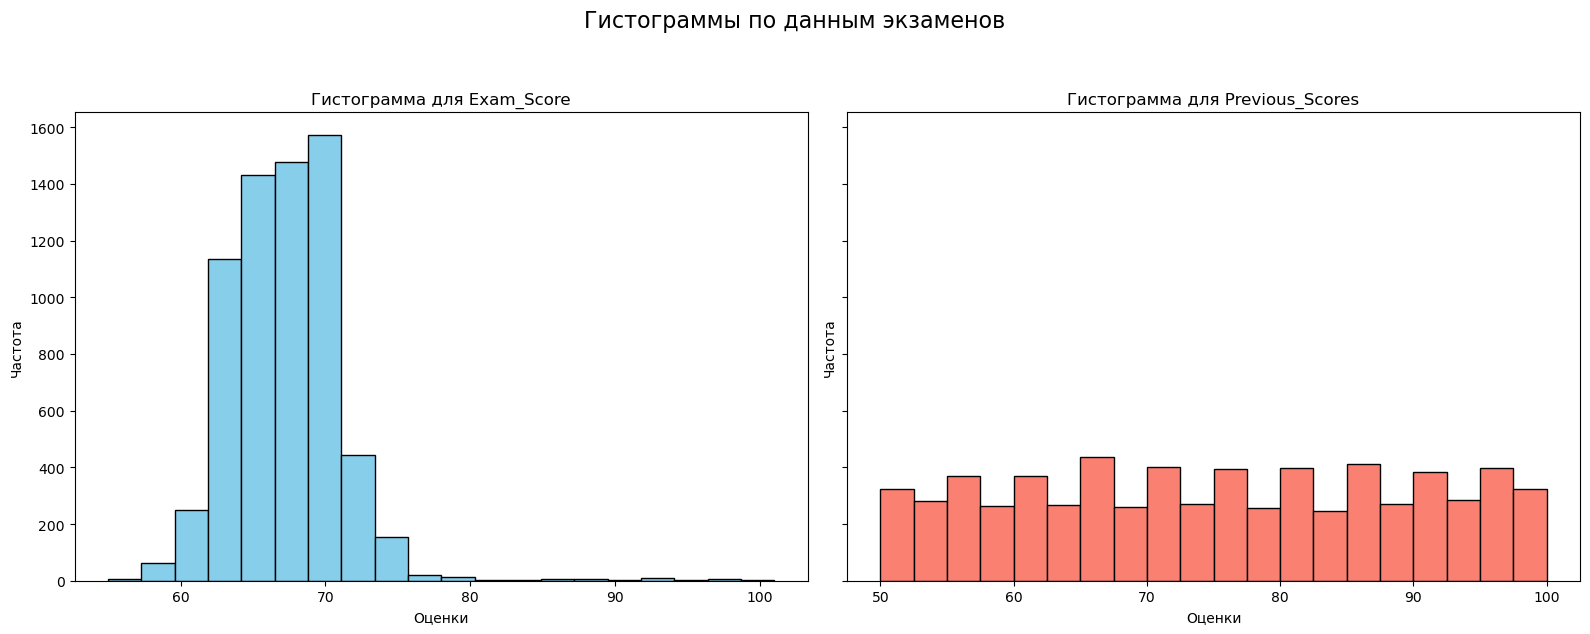

In [17]:
# Построение графиков

# Создаем 2 графика рядом
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Добавляем общий заголовок для всего ряда графиков
fig.suptitle(f'Гистограммы по данным экзаменов', fontsize=16, y=1.05)

# Строим гистограмму для Exam_Score
axes[0].hist(df['Exam_Score'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Гистограмма для Exam_Score')
axes[0].set_xlabel('Оценки')
axes[0].set_ylabel('Частота')

# Строим гистограмму для Previous_Scores
axes[1].hist(df['Previous_Scores'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Гистограмма для Previous_Scores')
axes[1].set_xlabel('Оценки')
axes[1].set_ylabel('Частота')

# Показываем графики
plt.tight_layout()
plt.show()

# Вывод: Расчеты подтвердились и у Exam_Score ярковыраженное положительное правостороннее смещение. А у Previous_Scores - фактически симметиричное распределение. Поэтому применим логарифмическое преобразование к Exam_Score.

In [18]:
# Выполним логарифмическое преобразование воспользовавшись методом библиотеки numpy

df['log_Exam_Score'] = np.log1p(df['Exam_Score'])  # на заметку себе   log1p(x) — это log(x + 1) т.к Exam_Score может быть нулевым а log(0) - вызовет ошибку т.к неопределн
skew(df['log_Exam_Score'])

0.9880685685172577

# Коэффициент ниже но все еще высокий. Построим гистограмму.

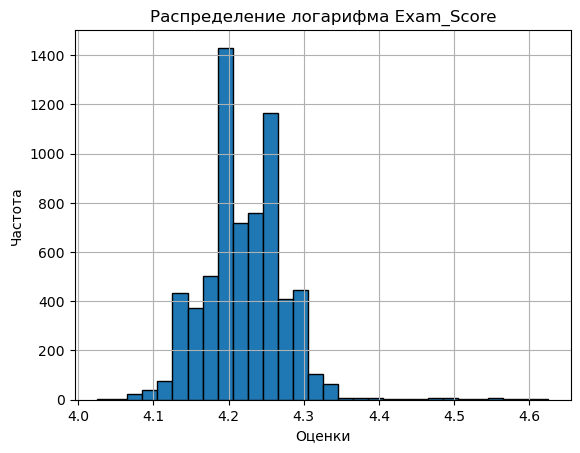

In [19]:
df['log_Exam_Score'].hist(bins=30, edgecolor='black')
plt.title('Распределение логарифма Exam_Score')
plt.xlabel('Оценки')
plt.ylabel('Частота')
plt.show() 

# Вывод: Преобразование не помогло, т.к мы не избавились от выбросов котрые у нас имеются (отчетливо видный "хвост" справана графиках). И это ошибка т.к этонадо делать в первую очередь. Поэтому надо избавиться от выбросов

# Для этого попробуем использовать два разных метода "Метод стандартного отклонения (STD)" и "Метод IQR (межквартильный размах) для определения оптимального.

In [20]:
# Функция для удаления выбросов с использованием стандартного отклонения

def remove_outliers_STD(df: pd.DataFrame, numerical_columns: List[str]) -> pd.DataFrame:
    """
    Удаляет выбросы в числовых столбцах DataFrame, используя метод стандартного отклонения.
    
    Параметры:
    df (pd.DataFrame): DataFrame, содержащий данные.
    numerical_columns (List[str]): Список имен столбцов, содержащих числовые данные.

    Возвращает:
    pd.DataFrame: DataFrame с удаленными выбросами.
    """
    for col in numerical_columns:
        
        mean = df[col].mean()  # вычисляем среднее
        std = df[col].std()  # вычисляем стандартное отклонение
        threshold_upper = mean + 3 * std  # верхняя граница
        threshold_lower = mean - 3 * std  # нижняя граница
        df = df[(df[col] >= threshold_lower) & (df[col] <= threshold_upper)]  # удаляем выбросы
        
        # Заменяем выбросы на NaN
        df[col] = df.apply(lambda x: x[col] if (x[col] >= threshold_lower) and (x[col] <= threshold_upper) else np.nan, axis=1)
        
    return df

In [21]:
# Функция для удаления выбросов с использованием IQR

def remove_outliers_IQR(df: pd.DataFrame, numerical_columns: List[str]) -> pd.DataFrame:
    """
    Удаляет выбросы в числовых столбцах DataFrame, используя метод IQR (межквартильный размах).
    
    Параметры:
    df (pd.DataFrame): DataFrame, содержащий данные.
    numerical_columns (List[str]): Список имен столбцов, содержащих числовые данные.

    Возвращает:
    pd.DataFrame: DataFrame с удаленными выбросами.
    """
    
    for col in numerical_columns:
        
        Q1 = df[col].quantile(0.25)  # первый квартиль
        Q3 = df[col].quantile(0.75)  # третий квартиль
        IQR = Q3 - Q1  # межквартильный размах
        lower_bound = Q1 - 1.5 * IQR  # нижняя граница для выбросов
        upper_bound = Q3 + 1.5 * IQR  # верхняя граница для выбросов
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # удаляем выбросы

        # Заменяем выбросы на NaN (а надо ли)
        df[col] = df.apply(lambda x: x[col] if (x[col] >= lower_bound) and (x[col] <= upper_bound) else np.nan, axis=1)
        
    return df


In [27]:
def add_filtered_columns(df: pd.DataFrame, numerical_columns: List[str]) -> pd.DataFrame:
    """
    Добавляет отфильтрованные столбцы с пометкой '_filtered' в базовый датасет.

    Параметры:
    df (pd.DataFrame): DataFrame, содержащий данные.
    numerical_columns (List[str]): Список имен столбцов с отфильтрованными данными.

    Возвращает:
    pd.DataFrame: Базовый DataFrame с добавленными столбцами.
    """
    
    # Добавляем столбцы с пометкой '_filtered'
    for col in numerical_columns:
        # данные уже отфильтрованы (в том числе NaN для выбросов)
        df[f'{col}_filtered'] = df[col]
    
    return df

In [22]:
# Применим функции к нашим данным

numerical_columns = ['Exam_Score']

# Применение метода STD
df_std_filtered: pd.DataFrame = remove_outliers_STD(df.copy(), numerical_columns)

# Применение метода IQR
df_iqr_filtered: pd.DataFrame = remove_outliers_IQR(df.copy(), numerical_columns)

In [23]:
# Посчитаем коэффициенты ассиметрии для обоих методов и построим их графики

print(f'Коэффициент для метода стандартного отклонения: {skew(df_std_filtered['Exam_Score'])}')
print(f'Коэффициент для метода межквантильного размаха: {skew(df_iqr_filtered['Exam_Score'])}')

Коэффициент для метода стандартного отклонения: 0.005416355060741192
Коэффициент для метода межквантильного размаха: 0.0052931993928564


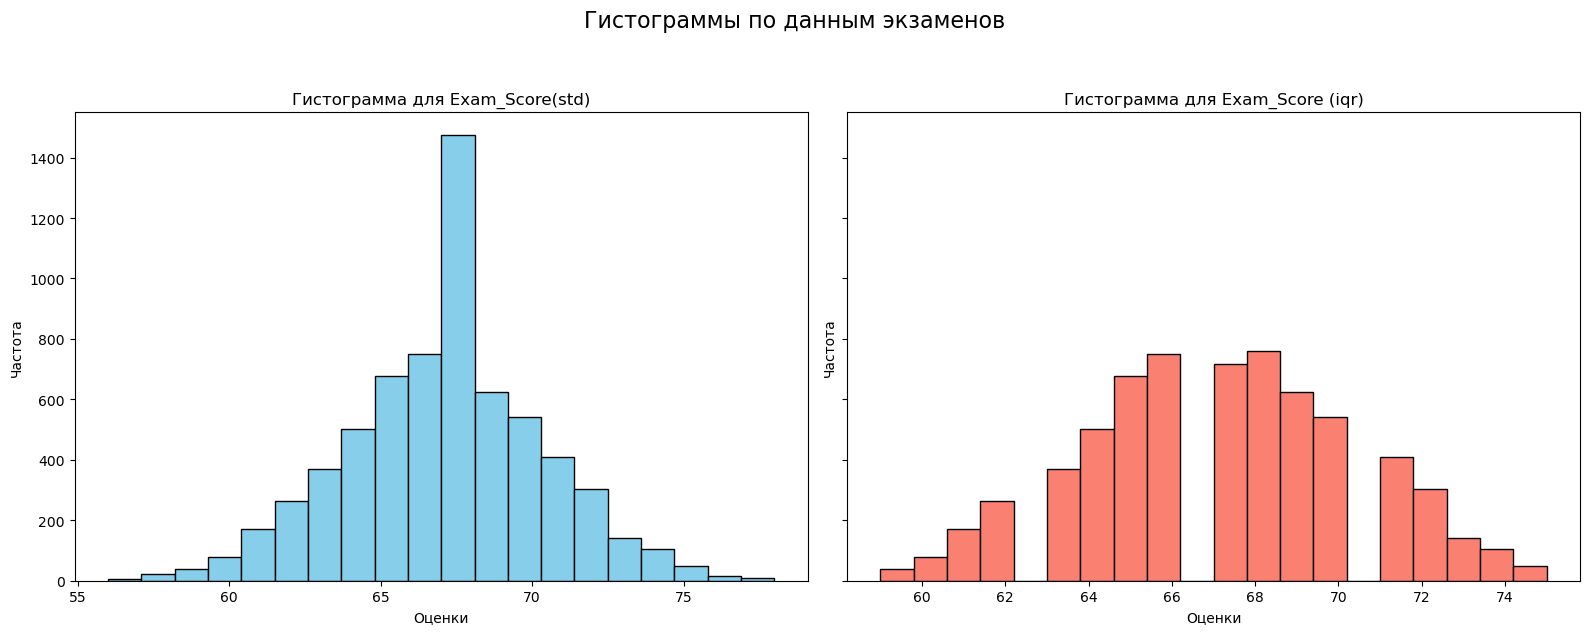

In [24]:
# Построение графиков

# Создаем 2 графика рядом
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Добавляем общий заголовок для всего ряда графиков
fig.suptitle(f'Гистограммы по данным экзаменов', fontsize=16, y=1.05)

# Строим гистограмму для Exam_Score
axes[0].hist(df_std_filtered['Exam_Score'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Гистограмма для Exam_Score(std)')
axes[0].set_xlabel('Оценки')
axes[0].set_ylabel('Частота')

# Строим гистограмму для Previous_Scores
axes[1].hist(df_iqr_filtered['Exam_Score'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Гистограмма для Exam_Score (iqr)')
axes[1].set_xlabel('Оценки')
axes[1].set_ylabel('Частота')

# Показываем графики
plt.tight_layout()
plt.show()

# Коэффициенты получились практически одинаковыми и с минимальным смещением. А вот по графику видно что лучше использовать мтеод стандартного отклонения, т.к он не исключил большу часть данных студентов имеющих оценки 67, а вот метод IRQ посчитал их выбросами. Что в данном случае не правильно. И для имеющихся данных подвергать их преобразованию не требуется. Поэтому результаты добавляем в спецальный столбец (с пометкой фильтр).


In [28]:
# Применим функциб добавлений фильтрованных столбцов

numerical_columns = ['Exam_Score']

df: pd.DataFrame = add_filtered_columns(df, numerical_columns)

# Проверим добавление 

df['Exam_Score_filtered'].head()

0    67
1    61
2    74
3    71
4    70
Name: Exam_Score_filtered, dtype: int64

In [ ]:
# Данные отображдаются значит столбец присутствует в базовом датасете

# Рассмотрим зависимости результатов экзаменов от внешних факторов.

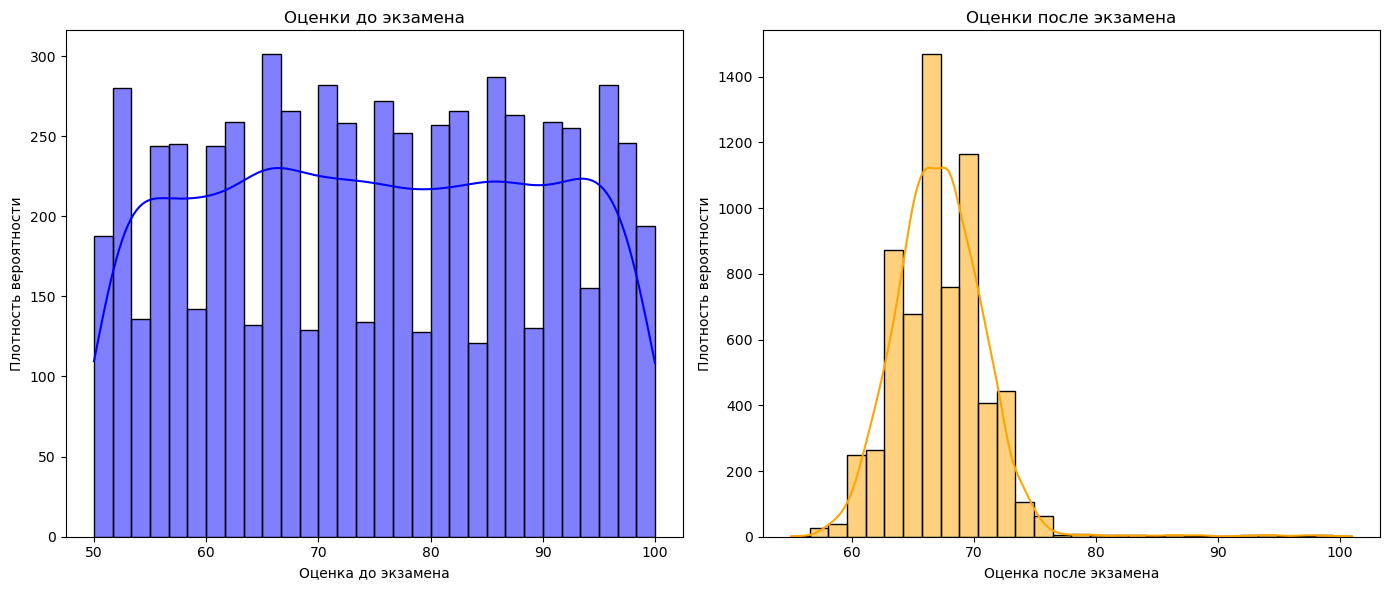

In [31]:
# Два графика для Previous_Scores и Exam_Score

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма для Previous_Scores

sns.histplot(df['Previous_Scores'], kde=True, color='blue', ax=axes[0], bins=30)
axes[0].set_title('Оценки до экзамена')
axes[0].set_xlabel('Оценка до экзамена')
axes[0].set_ylabel('Плотность вероятности')

# Гистограмма для Exam_Score

sns.histplot(df['Exam_Score_filtered'], kde=True, color='orange', ax=axes[1], bins=30)
axes[1].set_title('Оценки после экзамена')
axes[1].set_xlabel('Оценка после экзамена')
axes[1].set_ylabel('Плотность вероятности')

plt.tight_layout()
plt.show()

# Вывод: базовые оценки студентов выгядят почти равномерными, а после экзамена - нет.

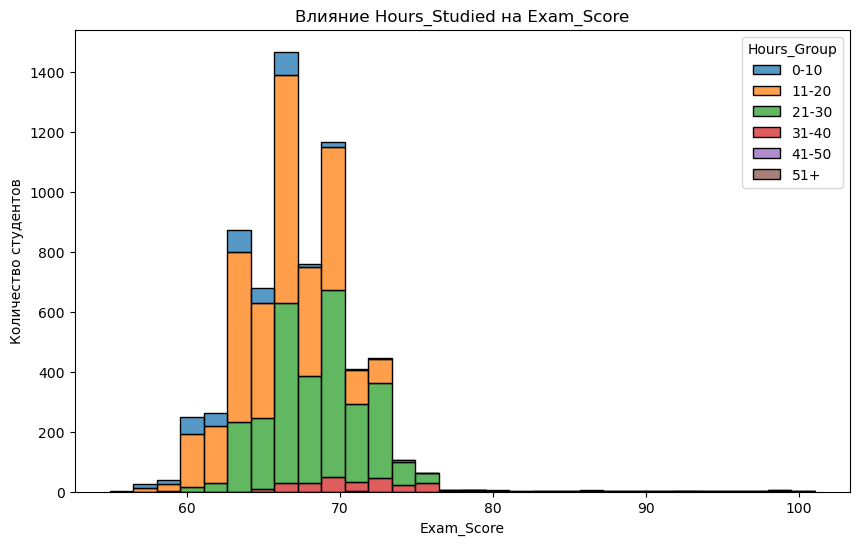

In [33]:
# Проверим завсисимость оценок от часов учебы

plt.figure(figsize=(10, 6))
df['Hours_Group'] = pd.cut(df['Hours_Studied'], bins=[0, 10, 20, 30, 40, 50, 60], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51+'])
sns.histplot(df, x='Exam_Score', hue='Hours_Group', multiple='stack', bins=30)

plt.title('Влияние Hours_Studied на Exam_Score')
plt.xlabel('Exam_Score')
plt.ylabel('Количество студентов')
plt.show()

# Вывод: из данного распередления сложно оценить зависисмоть. Одинаковые оценки имею и те кто занимался больше часов и те то занимался менбше часов. Нужно попробовать построить график с выделением

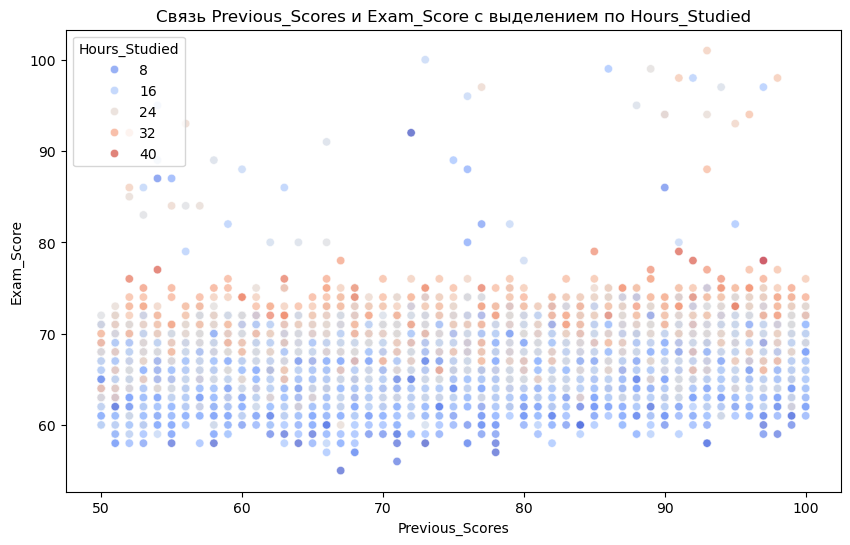

In [35]:
 # Строим график с выделением

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='Previous_Scores', y='Exam_Score', hue='Hours_Studied', palette='coolwarm', alpha=0.7)
plt.title('Связь Previous_Scores и Exam_Score с выделением по Hours_Studied')
plt.xlabel('Previous_Scores')
plt.ylabel('Exam_Score')
plt.legend(title='Hours_Studied')  # Легенда для цветовой кодировки
plt.show()

# Вывод:  То что график равномерен и кол-во часов затраченных на учебу показывает, что врядли это низкая квалификация учебного заведения. Скорее  тут разница в сложности экзамена (применительно для  СНГ разница между экзаменом в школе и приемным экзаменом в вузе). И получается, что нам и для дургих параметров нужно увидеть корреляцию между именно  Previous_Scores и Exam_Score и конкртеным факторам. т.к корреляция данных между студентами будет неправильной т.к у всех разная точка отсчета (т.е разная базовая оценка т.е разный базовый уровнь знаний)